<a href="https://colab.research.google.com/github/mrunaliyadav003/Chili-Diseases-detection-Using-Machine-Learning/blob/main/chili_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Successfully uninstalled tensorflow-2.13.0


In [ ]:
!pip install "tensorflow>=2.0.0"
!pip install --upgrade tensorflow-hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.1
    Uninstalling ml-dtypes-0.3.1:
      Successfully uninstalled ml-dtype

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [ ]:
import zipfile

# Define the path to the Kaggle dataset zip file (make sure to upload it to Colab beforehand)
zip_path = '/content/archive.zip'

# Define the path to the directory where you want to extract the dataset
extract_path = '/content/chilidataset'

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Print a success message
print('Dataset extraction complete!')

Dataset extraction complete!


In [ ]:
train_dir = '../content/chilidataset/train'
val_dir = '../content/chilidataset/val'
test_dir = '../content/chilidataset/test'

In [ ]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,
    zoom_range=0.2
)
val_test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(100,100),
    class_mode='categorical',
    shuffle=True
)

val_data = val_test_gen.flow_from_directory(
    val_dir,
    target_size=(100,100),
    class_mode='categorical',
    shuffle=True
)

test_data = val_test_gen.flow_from_directory(
    test_dir,
    target_size=(100,100),
    class_mode='categorical',
    shuffle=False
)

Found 400 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [ ]:
#Model Specification

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 batch_normalization (Batch  (None, 98, 98, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 49, 49, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 47, 47, 32)        1

In [ ]:
history = model.fit(
            train_data,
            validation_data=val_data,
            epochs=100)

Epoch 1/100
13/13 [==============================] - 8s 431ms/step - loss: 2.8842 - accuracy: 0.2450 - val_loss: 1.6007 - val_accuracy: 0.2200
Epoch 2/100
13/13 [==============================] - 7s 504ms/step - loss: 2.1913 - accuracy: 0.2975 - val_loss: 1.6409 - val_accuracy: 0.2200
Epoch 3/100
13/13 [==============================] - 6s 459ms/step - loss: 1.8360 - accuracy: 0.3300 - val_loss: 1.7238 - val_accuracy: 0.2200
Epoch 4/100
13/13 [==============================] - 6s 393ms/step - loss: 1.7891 - accuracy: 0.3800 - val_loss: 1.7900 - val_accuracy: 0.1600
Epoch 5/100
13/13 [==============================] - 7s 516ms/step - loss: 1.6333 - accuracy: 0.4150 - val_loss: 1.9572 - val_accuracy: 0.1400
Epoch 6/100
13/13 [==============================] - 5s 400ms/step - loss: 1.5194 - accuracy: 0.4025 - val_loss: 2.1207 - val_accuracy: 0.2000
Epoch 7/100
13/13 [==============================] - 6s 408ms/step - loss: 1.4538 - accuracy: 0.4000 - val_loss: 2.1875 - val_accuracy: 0.2000

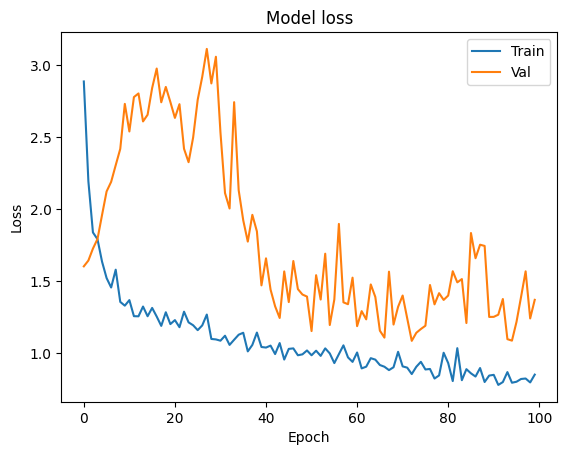

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

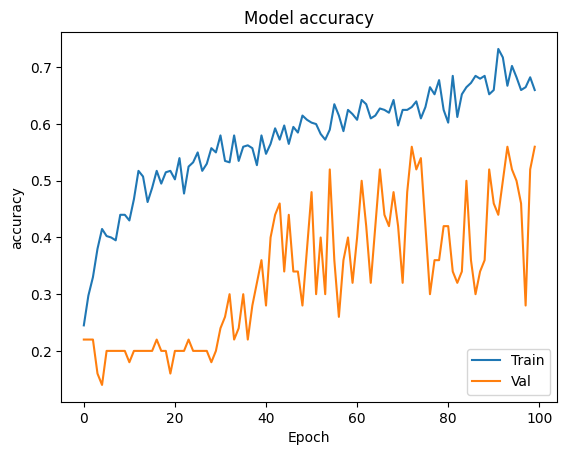

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
y_test = test_data.labels

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
y_pred_probs = model.predict(test_data)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

2/2 [==============================] - 1s 87ms/step


In [ ]:
accuracy_score(y_test, y_pred_classes)

0.66

In [ ]:
confusion_matrix(y_test, y_pred_classes)

array([[ 8,  2,  0,  0,  0],
       [ 1,  6,  0,  2,  1],
       [ 0,  0,  3,  2,  5],
       [ 0,  0,  4,  6,  0],
       [ 0,  0,  0,  0, 10]])

In [ ]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.75      0.60      0.67        10
           2       0.43      0.30      0.35        10
           3       0.60      0.60      0.60        10
           4       0.62      1.00      0.77        10

    accuracy                           0.66        50
   macro avg       0.66      0.66      0.65        50
weighted avg       0.66      0.66      0.65        50



In [ ]:
#save model architectur picture as png file

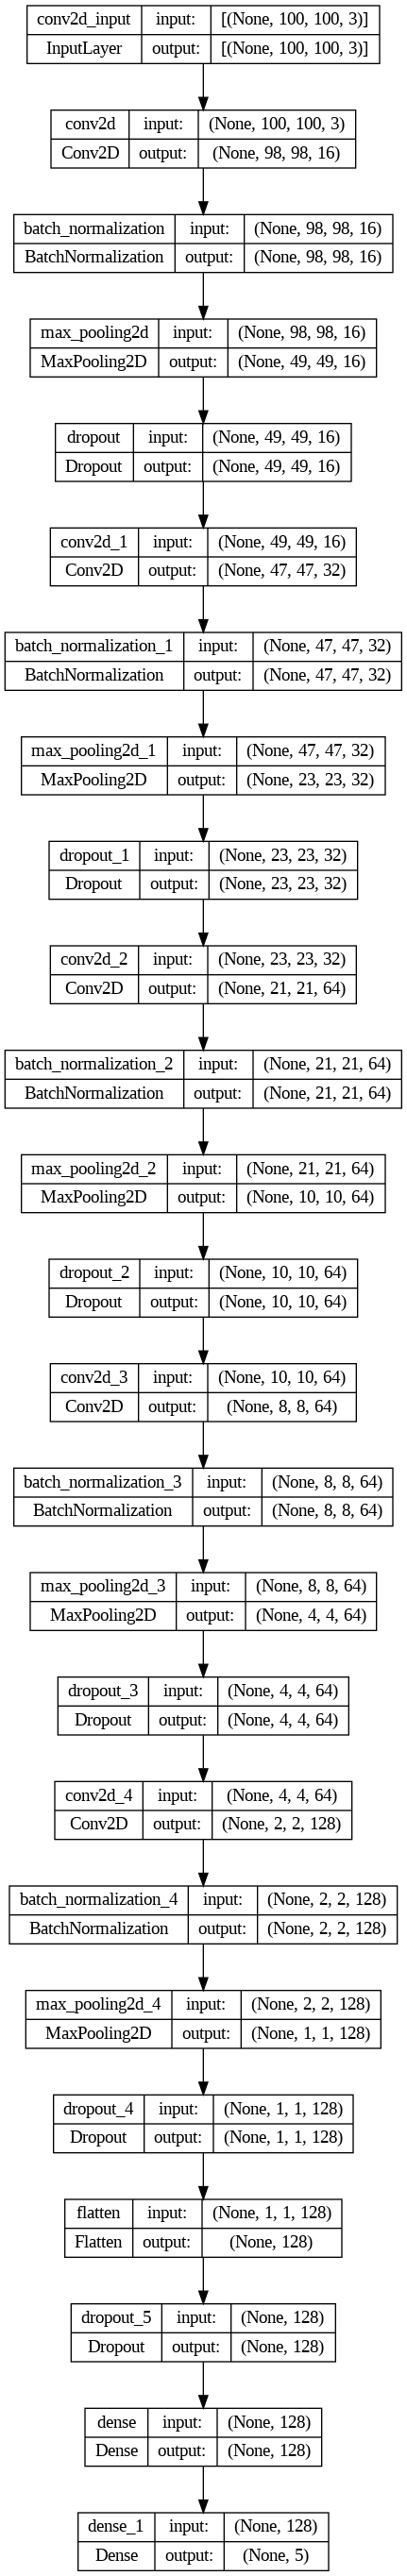

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
#save architecture as json and weight as h5
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")